## Tutorial: Exploring Soil Data from the NRCS Web Soil Survey (WSS)

This notebook demonstrates how to download, extract, and visualize soil data from the Natural Resources Conservation Service (NRCS) Web Soil Survey (WSS). We will focus on the STATSGO2 dataset for South Dakota.

The Web Soil Survey (WSS) is a valuable resource for accessing soil data and information compiled by the National Cooperative Soil Survey.

Here are the links to the data we will be using:

*   **Link to Data:** https://websoilsurvey.sc.egov.usda.gov/DSD/Download/Cache/STATSGO2/wss_gsmsoil_SD_[2016-10-13].zip
*   **Description of Data:** https://www.nrcs.usda.gov/sites/default/files/2022-08/SSURGO-Metadata-Table-Column-Descriptions-Report.pdf

The data is provided as a zip file containing spatial data (shapefiles) and tabular data (text files).

### Installing dependencies

We need to install the necessary Python libraries to work with spatial data and dataframes. We will use `pandas` for data manipulation, `geopandas` for working with geospatial data, and `matplotlib` for plotting.

In [ ]:
# uncomment the following code
#!pip install pandas==2.2.2 geopandas==0.14.3 fiona==1.9.6 matplotlib==3.8.4 requests==2.32.3 seaborn==0.13.2

### Import packages

Now, let's import the necessary libraries into our notebook.

In [ ]:
import os
import zipfile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.display import display
import matplotlib as mpl

## Read in Data from WSS

We will now download the data from the Web Soil Survey.

Set the URL of the zip file and the desired local path for the downloaded file and the extraction directory.

In [ ]:
url = "https://websoilsurvey.sc.egov.usda.gov/DSD/Download/Cache/STATSGO2/wss_gsmsoil_SD_[2016-10-13].zip"
zip_path = "wss_gsmsoil_SD.zip"
extract_dir = "soil_data_sd"

Display the paths to confirm they are set correctly.

In [ ]:
print(f"Downloading from: {url}")
print(f"Local zip file: {zip_path}")
print(f"Extract directory: {extract_dir}")

Local zip file: wss_gsmsoil_SD.zip
Extract directory: soil_data_sd


Download the zip file from the specified URL.

In [ ]:
print("Downloading zip file...")

response = requests.get(url, stream=True)

with open(zip_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f" Downloaded: {zip_path}")

 Downloaded: wss_gsmsoil_SD.zip


Extract the contents of the downloaded zip file to the specified directory.

In [ ]:
print(f"\nExtracting to: {extract_dir}")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extraction complete")


Extracting to: soil_data_sd
✅ Extraction complete


List the files within the extracted directory to see the dataset structure.

In [ ]:
print("\nFiles in extracted directory:")
print("-" * 40)
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        file_path = os.path.join(root, file)
        rel_path = os.path.relpath(file_path, extract_dir)
        print(f"  {rel_path}")


Files in extracted directory:
----------------------------------------
  wss_gsmsoil_SD_[2016-10-13]/soil_metadata_us.txt
  wss_gsmsoil_SD_[2016-10-13]/readme.txt
  wss_gsmsoil_SD_[2016-10-13]/soildb_US_2003.mdb
  wss_gsmsoil_SD_[2016-10-13]/soil_metadata_us.xml
  wss_gsmsoil_SD_[2016-10-13]/spatial/gsmsoilmu_a_sd.dbf
  wss_gsmsoil_SD_[2016-10-13]/spatial/version.txt
  wss_gsmsoil_SD_[2016-10-13]/spatial/gsmsoilmu_a_sd.shp
  wss_gsmsoil_SD_[2016-10-13]/spatial/gsmsoilmu_a_sd.prj
  wss_gsmsoil_SD_[2016-10-13]/spatial/gsmsoilmu_a_sd.shx
  wss_gsmsoil_SD_[2016-10-13]/tabular/chstrgrp.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/mstab.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/sdvattribute.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/cfprod.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/cpmat.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/ctxfmoth.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/msrsdet.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/csmoist.txt
  wss_gsmsoil_SD_[2016-10-13]/tabular/chfrags.txt
  wss_

To get a little background on the files and data we can view the readme file

In [ ]:
# Umcomment the following code to see the readme
# readme_file_path = os.path.join(extract_dir, "wss_gsmsoil_SD_[2016-10-13]", "readme.txt")

# with open(readme_file_path, 'r') as f:
#     readme_content = f.read()
# print(readme_content)

********************************************************************************
****  Index
********************************************************************************

Export Contents
Export Types
      Area of Interest (AOI)
      SSURGO
      STATSGO2
Unzipping Your Export
Importing the Tabular Data into a SSURGO Template Database
      Why Import the Tabular Data into a SSURGO Template Database?
      Microsoft Access Version Considerations and Security Related Issues
            Trusted Locations
            Macro Settings
      Importing Tabular Data
Spatial Data
      Spatial Data Format and Coordinate System
      Utilizing Soil Spatial Data
Terminology
      Area of Interest (AOI)
      Soil Survey Area
      SSURGO Template Database
      SSURGO
      STATSGO2
Obtaining Help

********************************************************************************
****  Export Contents
********************************************************************************

This export 

### Find shapefiles in the extracted directory

We are interested in the spatial data, which is typically stored in shapefiles (`.shp`). Let's find the shapefiles within the extracted data.

You can run the below code to find the shapefiles (`.shp`) or you can look throught the outputed information above for files ending in (`.shp`)

In [ ]:
shapefiles = []
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith('.shp'):
            shapefiles.append(os.path.join(root, file))
print(f"Found {len(shapefiles)} shapefiles:")
for shp in shapefiles:
    print(f"  - {os.path.relpath(shp, extract_dir)}")

Found 1 shapefiles:
  - wss_gsmsoil_SD_[2016-10-13]/spatial/gsmsoilmu_a_sd.shp


### Load the soil shapefile

The main soil data is usually contained in a shapefile with a name indicating the spatial extent (e.g., `gsmsoilmu_a_sd.shp` for South Dakota). We will load this shapefile into a GeoDataFrame using `geopandas`.

In [ ]:
main_shp = os.path.join(extract_dir, "wss_gsmsoil_SD_[2016-10-13]", "spatial", "gsmsoilmu_a_sd.shp")
gdf = gpd.read_file(main_shp)

### Examine the Data

Let's take a closer look at the data we loaded into the GeoDataFrame.

Display the first few rows of the GeoDataFrame to get a quick preview of the data.

In [ ]:
pd.set_option('display.max_columns', None)  #Show all columns
display(gdf.head(5))  # Show only the first 5 rows

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry
0,US,3,s6871,672359,"POLYGON ((-96.75075 43.50416, -96.75365 43.504..."
1,US,3,s6793,672281,"POLYGON ((-103.49977 43.32849, -103.50432 43.3..."
2,US,3,s6792,672280,"POLYGON ((-102.95403 44.33908, -102.95738 44.3..."
3,US,3,s6792,672280,"POLYGON ((-102.69247 44.36311, -102.69413 44.3..."
4,US,3,s6861,672349,"POLYGON ((-97.37897 42.86556, -97.38019 42.868..."


We can look throught this description of the data: https://www.nrcs.usda.gov/sites/default/files/2022-08/SSURGO-Metadata-Table-Column-Descriptions-Report.pdf to find what each column means


### Visualize Soil Data

Let's create a basic map of the soil map units (`MUSYM`) in South Dakota.

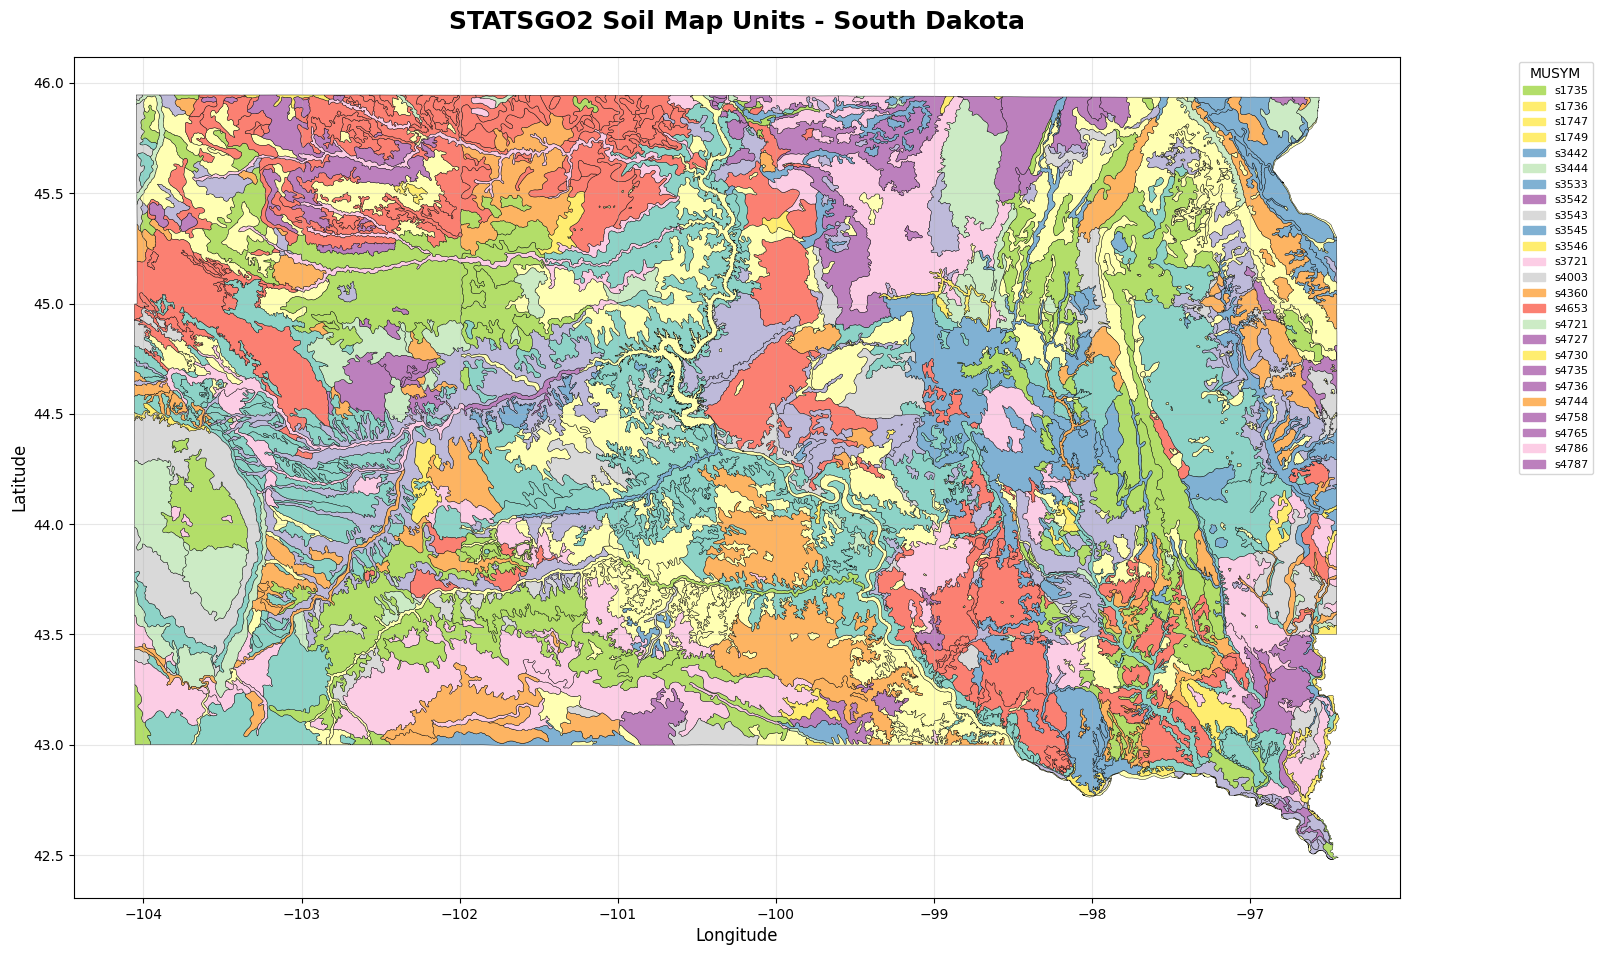

In [ ]:
# Create the map
soil_column = "MUSYM"
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Get unique soil types and create color map
unique_soils = gdf[soil_column].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_soils)))
color_dict = dict(zip(unique_soils, colors))

# Plot soil polygons
gdf.plot(ax=ax, legend=False,
            color=[color_dict.get(x, 'gray') for x in gdf[soil_column]],
            edgecolor='black', linewidth=0.3)

# Customize the map
ax.set_title('STATSGO2 Soil Map Units - South Dakota',
            fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, alpha=0.3)

# Add legend (top 25 soil types)
legend_elements = [mpatches.Patch(color=color_dict[soil], label=soil)
                    for soil in sorted(unique_soils)[:25]]
ax.legend(handles=legend_elements, loc='upper right',
            bbox_to_anchor=(1.15, 1), fontsize=8, title=f'{soil_column}')

plt.tight_layout()
plt.show()

### Loading and Examining Tabular Data

In addition to the spatial data, the WSS provides tabular data with detailed soil properties. We'll load the `muaggatt.txt` file, which contains aggregated attribute data for the map units.

Since this file does not have a header row, we need to provide the column names manually. These names are based on the data description link provided earlier in the notebook.

In [ ]:
# Define the column names for muaggatt.csv (no headers in file)
columns = [
    "musym", "muname", "mustatus", "slopegraddcp", "slopegradwta", "brockdepmin",
    "wtdepannmin", "wtdepaprjunmin", "flodfreqdcd", "flodfreqmax", "pondfreqprs",
    "aws025wta", "aws050wta", "aws0100wta", "aws0150wta", "drclassdcd", "drclasswettest",
    "hydgrpdcd", "iccdcd", "iccdcdpct", "niccdcd", "niccdcdpct", "engdwobdcd",
    "engdwbdcd", "engdwbll", "engdwbml", "engstafdcd", "engstafll", "engstafml",
    "engsldcd", "engsldcp", "englrsdcd", "engcmssdcd", "engcmssmp", "urbrecptdcd",
    "urbrecptwta", "forpehrtdcp", "hydclprs", "awmmfpwwta", "mukey"
]

# Load the muaggatt.csv file (update the path if needed)
muaggatt_path = r"soil_data_sd/wss_gsmsoil_SD_[2016-10-13]/tabular/muaggatt.txt"  # or .txt if that's your file extension
df = pd.read_csv(muaggatt_path, sep="|", engine="python", header=None, names=columns, dtype=str)

Now that the data is loaded, let's inspect the first few rows and check the column names to ensure everything loaded correctly.

In [ ]:
# Show the first 5 rows of the DataFrame with all columns
print("First 5 rows of df with all columns:")
pd.set_option('display.max_columns', None)  #Show all columns
display(df.head(5))  # Show only the first 5 rows

First 5 rows of df with all columns:


,musym,muname,mustatus,slopegraddcp,slopegradwta,brockdepmin,wtdepannmin,wtdepaprjunmin,flodfreqdcd,flodfreqmax,pondfreqprs,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswettest,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdcd,urbrecptwta,forpehrtdcp,hydclprs,awmmfpwwta,mukey
0,s8369,Water (s8369),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,657964
1,s4003,Pring-Assinniboine-Archin (s4003),NaN,5,7.5,NaN,NaN,NaN,NaN,NaN,0,3.83,7.21,12.48,16.89,Well drained,NaN,B,NaN,46,4,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,664040
2,s4360,Neldore-Marvan-Bascovy (s4360),NaN,4,7.4,38,NaN,NaN,NaN,NaN,0,3.76,7.01,10.61,13.28,Well drained,Well drained,D,NaN,60,6,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,664397
3,s4653,Winler-Orella-Epsie (s4653),NaN,17,18.4,38,NaN,NaN,NaN,NaN,0,2.64,4.66,5.33,5.69,Well drained,Well drained,D,NaN,98,6,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,664690
4,s4721,Peever-Overly-Nutley-Fargo-Dovray (s4721),NaN,2,1.7,NaN,153,153,NaN,NaN,0,4.43,8.44,16.15,23.39,Well drained,Moderately well drained,C,NaN,100,2,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,665014


We can see from the output that the `muaggatt.txt` file has been loaded into a pandas DataFrame and the columns are named according to the list we provided. The `mukey` column is the unique identifier for each map unit and will be used to link this tabular data to the spatial data.

Before merging the tabular data with the spatial GeoDataFrame, let's standardize the column names in both DataFrames by converting them to lowercase and removing leading/trailing whitespace. This helps prevent issues during the merge operation.

Now, let's merge the `muaggatt` DataFrame (`df`) with the `soil_gdf` GeoDataFrame (`gdf`) based on the common `mukey` column. We will use a left merge to keep all the spatial features and add the corresponding soil attributes.

After merging, we will display the first few rows of the merged GeoDataFrame to see the added columns.

In [ ]:
df.columns = df.columns.str.lower().str.strip()
gdf.columns = gdf.columns.str.lower().str.strip()
print("muaggatt columns before standardizing:", df.columns.tolist())
print("geojson columns before standardizing:", gdf.columns.tolist())

gdf = gdf.merge(df, on="mukey", how="left")

muaggatt columns before standardizing: ['musym', 'muname', 'mustatus', 'slopegraddcp', 'slopegradwta', 'brockdepmin', 'wtdepannmin', 'wtdepaprjunmin', 'flodfreqdcd', 'flodfreqmax', 'pondfreqprs', 'aws025wta', 'aws050wta', 'aws0100wta', 'aws0150wta', 'drclassdcd', 'drclasswettest', 'hydgrpdcd', 'iccdcd', 'iccdcdpct', 'niccdcd', 'niccdcdpct', 'engdwobdcd', 'engdwbdcd', 'engdwbll', 'engdwbml', 'engstafdcd', 'engstafll', 'engstafml', 'engsldcd', 'engsldcp', 'englrsdcd', 'engcmssdcd', 'engcmssmp', 'urbrecptdcd', 'urbrecptwta', 'forpehrtdcp', 'hydclprs', 'awmmfpwwta', 'mukey']
geojson columns before standardizing: ['areasymbol', 'spatialver', 'musym', 'mukey', 'geometry']


In [ ]:
pd.set_option('display.max_columns', None)  #Show all columns
display(gdf.head(5))  # Show only the first 5 rows
print("geojson columns before standardizing:", gdf.columns.tolist())

,areasymbol,spatialver,musym_x,mukey,geometry,musym_y,muname,mustatus,slopegraddcp,slopegradwta,brockdepmin,wtdepannmin,wtdepaprjunmin,flodfreqdcd,flodfreqmax,pondfreqprs,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswettest,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdcd,urbrecptwta,forpehrtdcp,hydclprs,awmmfpwwta
0,US,3,s6871,672359,"POLYGON ((-96.75075 43.50416, -96.75365 43.504...",s6871,Graceville-Dempster (s6871),NaN,1,1.5,NaN,NaN,NaN,NaN,NaN,0,5.21,10.22,19.29,26.29,Well drained,Well drained,B,NaN,96,2,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
1,US,3,s6793,672281,"POLYGON ((-103.49977 43.32849, -103.50432 43.3...",s6793,Tilford-Nevee (s6793),NaN,5,14,NaN,NaN,NaN,NaN,NaN,0,4.6,8.67,16.17,23.26,Well drained,Well drained,B,NaN,100,3,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,US,3,s6792,672280,"POLYGON ((-102.95403 44.33908, -102.95738 44.3...",s6792,Satanta-Pierre-Nunn (s6792),NaN,4,6.8,NaN,NaN,NaN,NaN,NaN,0,4.16,7.94,14.91,21.24,Well drained,Well drained,C,NaN,81,3,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,US,3,s6792,672280,"POLYGON ((-102.69247 44.36311, -102.69413 44.3...",s6792,Satanta-Pierre-Nunn (s6792),NaN,4,6.8,NaN,NaN,NaN,NaN,NaN,0,4.16,7.94,14.91,21.24,Well drained,Well drained,C,NaN,81,3,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,US,3,s6861,672349,"POLYGON ((-97.37897 42.86556, -97.38019 42.868...",s6861,Wentworth-Ethan-Egan (s6861),NaN,4,3.6,NaN,NaN,NaN,NaN,NaN,0,5.01,9.74,19.04,28.13,Well drained,Well drained,B,NaN,92,2,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN


geojson columns before standardizing: ['areasymbol', 'spatialver', 'musym_x', 'mukey', 'geometry', 'musym_y', 'muname', 'mustatus', 'slopegraddcp', 'slopegradwta', 'brockdepmin', 'wtdepannmin', 'wtdepaprjunmin', 'flodfreqdcd', 'flodfreqmax', 'pondfreqprs', 'aws025wta', 'aws050wta', 'aws0100wta', 'aws0150wta', 'drclassdcd', 'drclasswettest', 'hydgrpdcd', 'iccdcd', 'iccdcdpct', 'niccdcd', 'niccdcdpct', 'engdwobdcd', 'engdwbdcd', 'engdwbll', 'engdwbml', 'engstafdcd', 'engstafll', 'engstafml', 'engsldcd', 'engsldcp', 'englrsdcd', 'engcmssdcd', 'engcmssmp', 'urbrecptdcd', 'urbrecptwta', 'forpehrtdcp', 'hydclprs', 'awmmfpwwta']


As you can see in the output above, the GeoDataFrame now includes the attribute columns from the `muaggatt.txt` file, appended to the original spatial data. We can now use these attributes for mapping and analysis.

### Visualizing Soil Attributes

With the merged data, we can now create maps that visualize specific soil attributes across South Dakota. Let's create a map showing the available water storage at 0-150 cm depth (`aws0150wta`). This attribute is important for understanding soil moisture availability for plants.

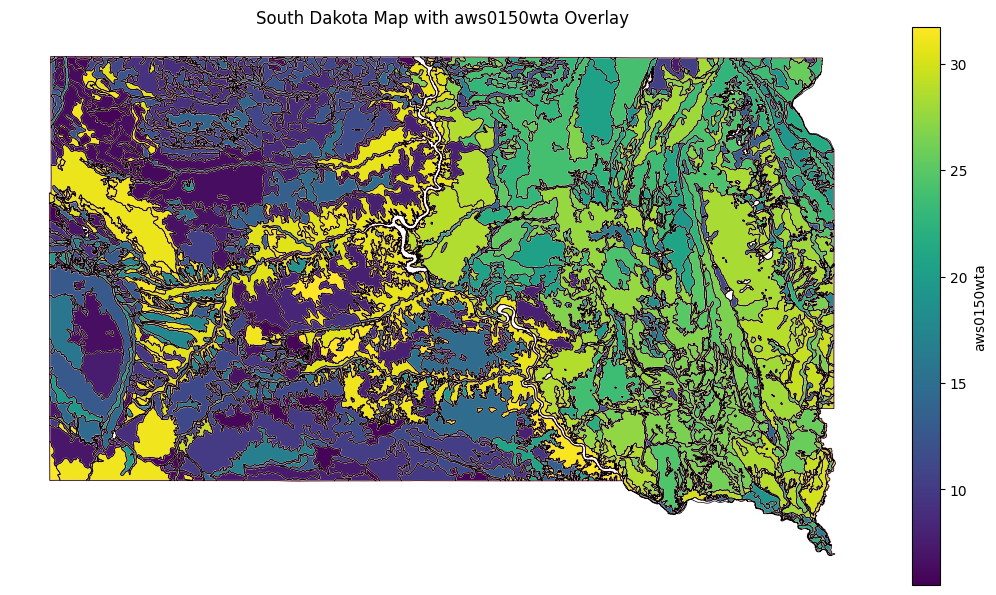

In [ ]:
soil_column = 'aws0150wta'
gdf_overlay = gdf[~gdf[soil_column].isna()].copy()

# Bin the data into 25 ranges (optional, for discrete bins)
num_bins = 25
gdf_overlay['binned'] = pd.cut(
    gdf_overlay[soil_column].astype(float),
    bins=num_bins,
    include_lowest=True
)

# Set up colormap and normalization
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(
    vmin=gdf_overlay[soil_column].astype(float).min(),
    vmax=gdf_overlay[soil_column].astype(float).max()
)

# Plot base map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Plot overlay (use the original column for a smooth colorbar)
gdf_overlay.plot(
    column=soil_column,
    ax=ax,
    legend=False,  # We'll add a custom colorbar
    cmap=cmap,
    edgecolor='pink'
)

# Create ScalarMappable and add colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Required for older matplotlib versions

cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label(soil_column)

ax.set_title(f'South Dakota Map with {soil_column} Overlay')
ax.set_axis_off()
plt.show()